In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset in a data frame
data=pd.read_csv('https://hastie.su.domains/ElemStatLearn/datasets/SAheart.data')

In [3]:
# create copy of dataset for backup
data_copy=data.copy()

In [4]:
# checking first 5 entries
data.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [5]:
# number of rows and columns in a data
data.shape

(462, 11)

In [6]:
# getting information (metadata)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  462 non-null    int64  
 1   sbp        462 non-null    int64  
 2   tobacco    462 non-null    float64
 3   ldl        462 non-null    float64
 4   adiposity  462 non-null    float64
 5   famhist    462 non-null    object 
 6   typea      462 non-null    int64  
 7   obesity    462 non-null    float64
 8   alcohol    462 non-null    float64
 9   age        462 non-null    int64  
 10  chd        462 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB


In [7]:
# checking type of data 
type(data)

pandas.core.frame.DataFrame

In [8]:
# getting column names of the dataset
data.columns

Index(['row.names', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea',
       'obesity', 'alcohol', 'age', 'chd'],
      dtype='object')

In [9]:
# getting column names of the dataset in the list form
list(data.columns)

['row.names',
 'sbp',
 'tobacco',
 'ldl',
 'adiposity',
 'famhist',
 'typea',
 'obesity',
 'alcohol',
 'age',
 'chd']

In [10]:
# trying slicing to get first 5 records
data[:5]

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [11]:
# getting last 5 records using slicing
data[-5:]

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
457,459,214,0.4,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.2,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.0,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.4,11.61,30.79,Absent,64,27.35,23.97,40,0
461,463,132,0.0,4.82,33.41,Present,62,14.70,0.00,46,1


In [12]:
# getting last 5 records using tail method
data.tail()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
457,459,214,0.4,5.98,31.72,Absent,64,28.45,0.00,58,0
458,460,182,4.2,4.41,32.10,Absent,52,28.61,18.72,52,1
459,461,108,3.0,1.59,15.23,Absent,40,20.09,26.64,55,0
460,462,118,5.4,11.61,30.79,Absent,64,27.35,23.97,40,0
461,463,132,0.0,4.82,33.41,Present,62,14.70,0.00,46,1


In [13]:
# checking family history's top 5 values
data['famhist'][:5]

0    Present
1     Absent
2    Present
3    Present
4    Present
Name: famhist, dtype: object

In [14]:
# checking tobacco and family history's top 5 values
data[['famhist','tobacco']][:5]

,famhist,tobacco
0,Present,12.00
1,Absent,0.01
2,Present,0.08
3,Present,7.50
4,Present,13.60


In [15]:
# another slicing example of getting rows from 4 to 9(excluding) and columns(1 to 5 (excluding))
data.iloc[4:9,1:5]

,sbp,tobacco,ldl,adiposity
4,134,13.60,3.50,27.78
5,132,6.20,6.47,36.21
6,142,4.05,3.38,16.20
7,114,4.08,4.59,14.60
8,114,0.00,3.83,19.40


In [16]:
# count of unique family history values i.e. (Present and Absent)
data['famhist'].value_counts()

famhist
Absent     270
Present    192
Name: count, dtype: int64

In [17]:
# percentage of occurances of each unique value
data['famhist'].value_counts(normalize=True)*100

famhist
Absent     58.441558
Present    41.558442
Name: proportion, dtype: float64

In [18]:
# find occurances for the combination of values for famhist and chd columns
pd.crosstab(data['famhist'],data['chd'])

chd,0,1
famhist,,
Absent,206,64
Present,96,96


#### 1. Nearly 76.3% people who did not have any family history were CHD negative. 
#### 2. The person having family history of heart disease has 50% chances of getting CHD

In [19]:
data[['alcohol', 'age']].sort_values(by='age')

,alcohol,age
42,0.00,15
70,0.60,15
13,0.97,15
110,2.49,16
162,0.00,16
...,...,...
379,1.54,64
276,11.83,64
203,19.20,64
228,2.06,64


In [20]:
data[['obesity', 'age']].sort_values(by='age')

,obesity,age
42,22.15,15
70,19.15,15
13,23.63,15
110,25.51,16
162,22.16,16
...,...,...
379,33.17,64
276,28.75,64
203,23.81,64
228,27.25,64


In [21]:
# finding average age
data['age'].mean()

42.816017316017316

In [22]:
data.groupby('chd')['age'].mean()

chd
0    38.854305
1    50.293750
Name: age, dtype: float64

#### Average age of getting CHD is 50.

### draw a barplot to show number of persons having CHD or not in comparison to having family history or not

<Axes: xlabel='chd', ylabel='count'>

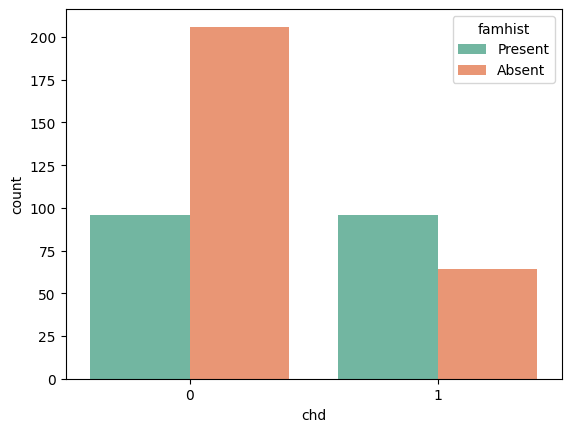

In [23]:
sns.countplot(x='chd', hue='famhist', data=data, palette='Set2')


## Encoding famhist column using 'map'

In [24]:
data['famhist']

0      Present
1       Absent
2      Present
3      Present
4      Present
        ...   
457     Absent
458     Absent
459     Absent
460     Absent
461    Present
Name: famhist, Length: 462, dtype: object

In [25]:
data['famhist'] = data['famhist'].map({'Present': 1, 'Absent': 0})

In [26]:
data['famhist']

0      1
1      0
2      1
3      1
4      1
      ..
457    0
458    0
459    0
460    0
461    1
Name: famhist, Length: 462, dtype: int64

## Correlation

In [27]:
data.corr()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,1.000000,0.171583,-0.044813,-0.064014,0.033851,0.019941,-0.147769,-0.026758,0.088825,-0.014064,-0.063808
sbp,0.171583,1.000000,0.212247,0.158296,0.356500,0.085645,-0.057454,0.238067,0.140096,0.388771,0.192354
tobacco,-0.044813,0.212247,1.000000,0.158905,0.286640,0.088601,-0.014608,0.124529,0.200813,0.450330,0.299718
ldl,-0.064014,0.158296,0.158905,1.000000,0.440432,0.161353,0.044048,0.330506,-0.033403,0.311799,0.263053
adiposity,0.033851,0.356500,0.286640,0.440432,1.000000,0.181721,-0.043144,0.716556,0.100330,0.625954,0.254121
famhist,0.019941,0.085645,0.088601,0.161353,0.181721,1.000000,0.044809,0.115595,0.080520,0.239667,0.272373
typea,-0.147769,-0.057454,-0.014608,0.044048,-0.043144,0.044809,1.000000,0.074006,0.039498,-0.102606,0.103156
obesity,-0.026758,0.238067,0.124529,0.330506,0.716556,0.115595,0.074006,1.000000,0.051620,0.291777,0.100095
alcohol,0.088825,0.140096,0.200813,-0.033403,0.100330,0.080520,0.039498,0.051620,1.000000,0.101125,0.062531
age,-0.014064,0.388771,0.450330,0.311799,0.625954,0.239667,-0.102606,0.291777,0.101125,1.000000,0.372973


### Correlation between two columns

In [28]:
data['sbp'].corr(data['age'])

0.3887705972765735

#### Systolic Blood Pressure has moderately positive correlation with age.

### Heatmap between four columns

In [29]:
columns_to_heatmap = data[['sbp','obesity','age','ldl']]

<Axes: >

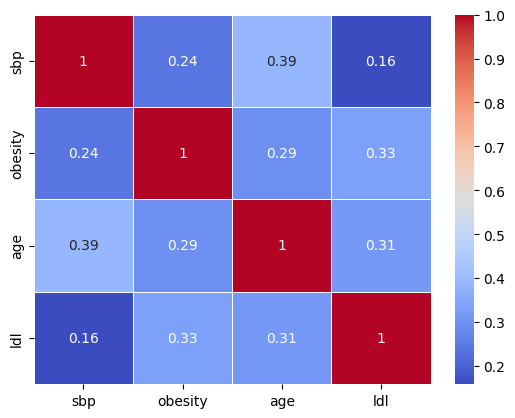

In [30]:
sns.heatmap(columns_to_heatmap.corr(), annot=True, cmap='coolwarm', linewidths=.5 )

### Distribution Plot of tobacco consumption and whether a person has CHD or not

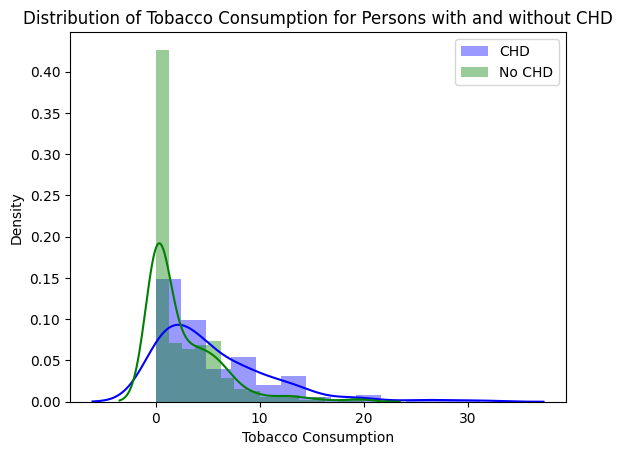

In [31]:
sns.distplot(data[data['chd'] == 1]['tobacco'], label='CHD', hist=True, kde=True, color='blue')
sns.distplot(data[data['chd'] == 0]['tobacco'], label='No CHD', hist=True, kde=True, color='green')
plt.xlabel('Tobacco Consumption')
plt.ylabel('Density')
plt.title('Distribution of Tobacco Consumption for Persons with and without CHD')
plt.legend()
plt.show()

#### As the tobacco consumption increases so is the risk of getting CHD.

### a new column of different age ranges

In [32]:
labels=['young','adults','mid', 'old']

# Define conditions and labels
conditions = [
    (data['age'] >= 0) & (data_copy['age'] < 15),       
    (data['age'] >= 15) & (data_copy['age'] < 35),
    (data['age'] >= 35) & (data_copy['age'] < 55),
    (data['age'] >= 55)       
]
data['agegroup']=np.select(conditions, labels)

In [33]:
data['agegroup']

0      mid
1      old
2      mid
3      old
4      mid
      ... 
457    old
458    mid
459    old
460    mid
461    mid
Name: agegroup, Length: 462, dtype: object

In [34]:
data['agegroup'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 462 entries, 0 to 461
Series name: agegroup
Non-Null Count  Dtype 
--------------  ----- 
462 non-null    object
dtypes: object(1)
memory usage: 3.7+ KB


In [35]:
data.groupby('agegroup')['chd'].value_counts()

agegroup  chd
adults    0      125
          1       18
mid       0      118
          1       71
old       1       71
          0       59
Name: count, dtype: int64

<Axes: xlabel='agegroup', ylabel='count'>

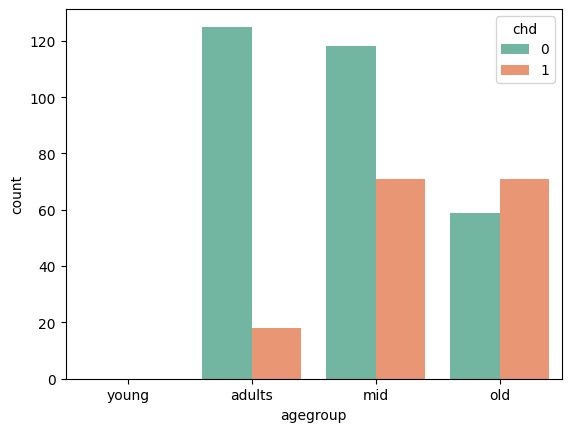

In [36]:
agegroup_order = ['young','adults','mid','old']
sns.countplot(x='agegroup', hue='chd', data=data, palette='Set2', order=agegroup_order)

#### It can be seen here that as a person reach his/her mid age risk of getting chd increases whereas adults have less CHD. Same can be said from the box plot below.

<Axes: xlabel='ldl', ylabel='agegroup'>

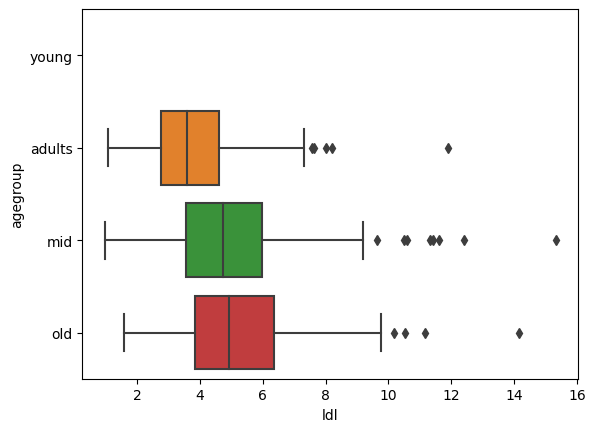

In [37]:
sns.boxplot(x='ldl', y='agegroup', data=data, order=agegroup_order)